In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from lib import utils2
import pickle
seed = 4

In [2]:
data = pd.read_csv('./data/fluxModelData.csv', index_col=['Origen', 'Destino'])
data

Caminando  Transporte Colectivo  Taxi  Bicicleta  Motocicleta  \
Origen Destino                                                                  
1.0    1.0         2175.0                 623.0   0.0        0.0          0.0   
       2.0          212.0                 147.0   0.0        0.0          0.0   
       3.0            0.0                 165.0   0.0        0.0          0.0   
       4.0            0.0                 311.0   0.0        0.0          0.0   
       14.0           0.0                 311.0   0.0        0.0          0.0   
...                   ...                   ...   ...        ...          ...   
490.0  403.0          0.0                   0.0   0.0        0.0          0.0   
       406.0          0.0                   0.0   0.0        0.0          0.0   
       446.0          0.0                   0.0   0.0        0.0          0.0   
       458.0          0.0                   0.0   0.0        0.0          0.0   
       490.0        200.0                   0.0   0.0        0.0          0.0   

                Vehiculo  Otros  Total  \
Origen Destino                           
1.0    1.0           0.0    0.0   2798   
       2.0         185.0    0.0    544   
       3.0           0.0    0.0    165   
       4.0           0.0    0.0    311   
       14.0          0.0    0.0    311   
...                  ...    ...    ...   
490.0  403.0       200.0    0.0    200   
       406.0       453.0    0.0    453   
       446.0       520.0    0.0    520   
       458.0       142.0    0.0    142   
       490.0       400.0    0.0    600   

                datosAgrupados_Caminando_destino__ORIGEN  \
Origen Destino                                             
1.0    1.0                                        4663.0   
       2.0                                        4663.0   
       3.0                                        4663.0   
       4.0                                        4663.0   
       14.0                                       4663.0   
...                                                  ...   
490.0  403.0                                       200.0   
       406.0                                       200.0   
       446.0                                       200.0   
       458.0                                       200.0   
       490.0                                       200.0   

                datosAgrupados_Transporte_Colectivo_destino__ORIGEN  ...  \
Origen Destino                                                       ...   
1.0    1.0                                                 5428.0    ...   
       2.0                                                 5428.0    ...   
       3.0                                                 5428.0    ...   
       4.0                                                 5428.0    ...   
       14.0                                                5428.0    ...   
...                                                           ...    ...   
490.0  403.0                                               1051.0    ...   
       406.0                                               1051.0    ...   
       446.0                                               1051.0    ...   
       458.0                                               1051.0    ...   
       490.0                                               1051.0    ...   

                sum_VPH_CVJ__DESTINO  sum_VPH_SINRTV__DESTINO  \
Origen Destino                                                  
1.0    1.0                     234.0                     10.0   
       2.0                     128.0                      6.0   
       3.0                     167.0                      0.0   
       4.0                      28.0                      3.0   
       14.0                    279.0                      6.0   
...                              ...                      ...   
490.0  403.0                  2093.0                     21.0   
       406.0                   486.0                     34.

In [3]:
data.fillna(0, inplace=True)

In [16]:
targets = ['Caminando', 'Transporte Colectivo', 'Taxi', 'Bicicleta', 'Motocicleta', 'Vehiculo', 'Otros', 'Total']
categorical = data.select_dtypes(include=['object']).columns
codes = [x for x in data.columns if 'CODIGO' in x]
predictors = [x for x in data.columns if x not in targets and x not in categorical and x not in codes]

In [17]:
train, test = train_test_split(data, test_size=0.2, random_state=seed)
X_train, y_train, X_test, y_test = train[predictors], train[targets], test[predictors], test[targets]

## MLP

In [6]:
from sklearn.neural_network import MLPRegressor
NN1 = MLPRegressor(random_state=seed)
NN1.fit(X_train, y_train)

MLPRegressor(random_state=4)

In [7]:
pred_y_NN = NN1.predict(X_test)
mae = metrics.mean_absolute_error(y_test, pred_y_NN)
r2 = metrics.r2_score(y_test, pred_y_NN)
mse = metrics.mean_squared_error(y_test, pred_y_NN)
print('R2:', r2)
print("MSE:", mse)
print("MAE:", mae)

R2: -5618.214789528329
MSE: 32896377.843063116
MAE: 1504.2286887691996


## Simple NN

In [18]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [19]:
input_tensor = Input(shape = X_train.iloc[1].shape)

x_tensor = Dense(64, activation = 'relu', name = 'dl_01')(input_tensor)
x_tensor = Dense(64, activation = 'relu', name = 'dl_02')(x_tensor)

output_tensor = Dense(8, name = 'top_layer')(x_tensor)

In [20]:
model_0 = Model(inputs = input_tensor, outputs = output_tensor)
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2286)]            0         
                                                                 
 dl_01 (Dense)               (None, 64)                146368    
                                                                 
 dl_02 (Dense)               (None, 64)                4160      
                                                                 
 top_layer (Dense)           (None, 8)                 520       
                                                                 
Total params: 151048 (590.03 KB)
Trainable params: 151048 (590.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
plot_model(model_0, to_file='./model/NN/model_0.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [26]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model_0.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [27]:
example_batch = X_train[:10]
example_result = model_0.predict(example_batch)
example_result

1/1 [==============================] - 0s 128ms/step


array([[ 4.02801285e+01,  1.69777603e+02,  8.95362663e+00,
         7.25639877e+01, -1.06663445e+02,  3.29514282e+02,
         4.78880501e+01,  6.33329590e+02],
       [-8.41918373e+00,  1.39067032e+02, -9.13543892e+00,
         2.33897648e+01, -5.92840919e+01,  1.63755386e+02,
         4.58067665e+01,  3.49285614e+02],
       [-3.74819870e+01,  1.04397984e+01,  2.61935253e+01,
         5.08009300e+01, -7.22832260e+01,  1.83603378e+02,
         7.90628433e+01,  2.15883942e+02],
       [ 1.49574661e+02,  1.85989105e+02, -1.59001331e+01,
         2.53933964e+01,  1.06383383e-01,  1.95386856e+02,
         5.42981224e+01,  4.87627289e+02],
       [ 2.68699093e+01,  1.49928558e+02,  1.54352245e+01,
         3.25797997e+01, -7.02587662e+01,  4.68889435e+02,
         3.97102165e+01,  7.15257690e+02],
       [-1.44921818e+01,  1.35202530e+02, -2.62932148e+01,
         5.28878441e+01, -4.63239937e+01,  1.26740074e+02,
         5.62426872e+01,  2.36620819e+02],
       [-2.45565128e+01,  1.199563

In [28]:
# Entrenamiento de la red neuronal
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("./model/NN/model_0.h5", monitor="val_loss", mode="min", save_best_only=True)
model_history=model_0.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=100, verbose=1, callbacks=[early_stop, model_checkpoint])

Epoch 1/100
114/114 [==============================] - 1s 8ms/step - loss: 117815.0078 - mae: 126.0516 - mse: 117815.0078 - val_loss: 100330.0469 - val_mae: 136.1321 - val_mse: 100330.0469
Epoch 2/100
 37/114 [========>.....................] - ETA: 0s - loss: 94443.6875 - mae: 121.2672 - mse: 94443.6875  

c:\Users\Rafael\anaconda3\envs\lpd\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


114/114 [==============================] - 1s 5ms/step - loss: 114337.5391 - mae: 122.9614 - mse: 114337.5391 - val_loss: 110942.4297 - val_mae: 123.3428 - val_mse: 110942.4297
Epoch 3/100
114/114 [==============================] - 1s 5ms/step - loss: 109074.3281 - mae: 122.7816 - mse: 109074.3281 - val_loss: 141784.7031 - val_mae: 133.1721 - val_mse: 141784.7031
Epoch 4/100
114/114 [==============================] - 1s 5ms/step - loss: 111760.1562 - mae: 120.2574 - mse: 111760.1562 - val_loss: 127972.6562 - val_mae: 126.6924 - val_mse: 127972.6719
Epoch 5/100
114/114 [==============================] - 1s 6ms/step - loss: 97460.7734 - mae: 120.5506 - mse: 97460.7734 - val_loss: 211952.9375 - val_mae: 147.1474 - val_mse: 211952.9375
Epoch 6/100
114/114 [==============================] - 1s 5ms/step - loss: 98729.0234 - mae: 118.6190 - mse: 98729.0234 - val_loss: 176555.0938 - val_mae: 142.3062 - val_mse: 176555.0938
Epoch 7/100
114/114 [==============================] - 1s 5ms/step - lo

C:\Users\Rafael\AppData\Local\Temp\ipykernel_24524\2020191033.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data[targets].hist(ax = ax)


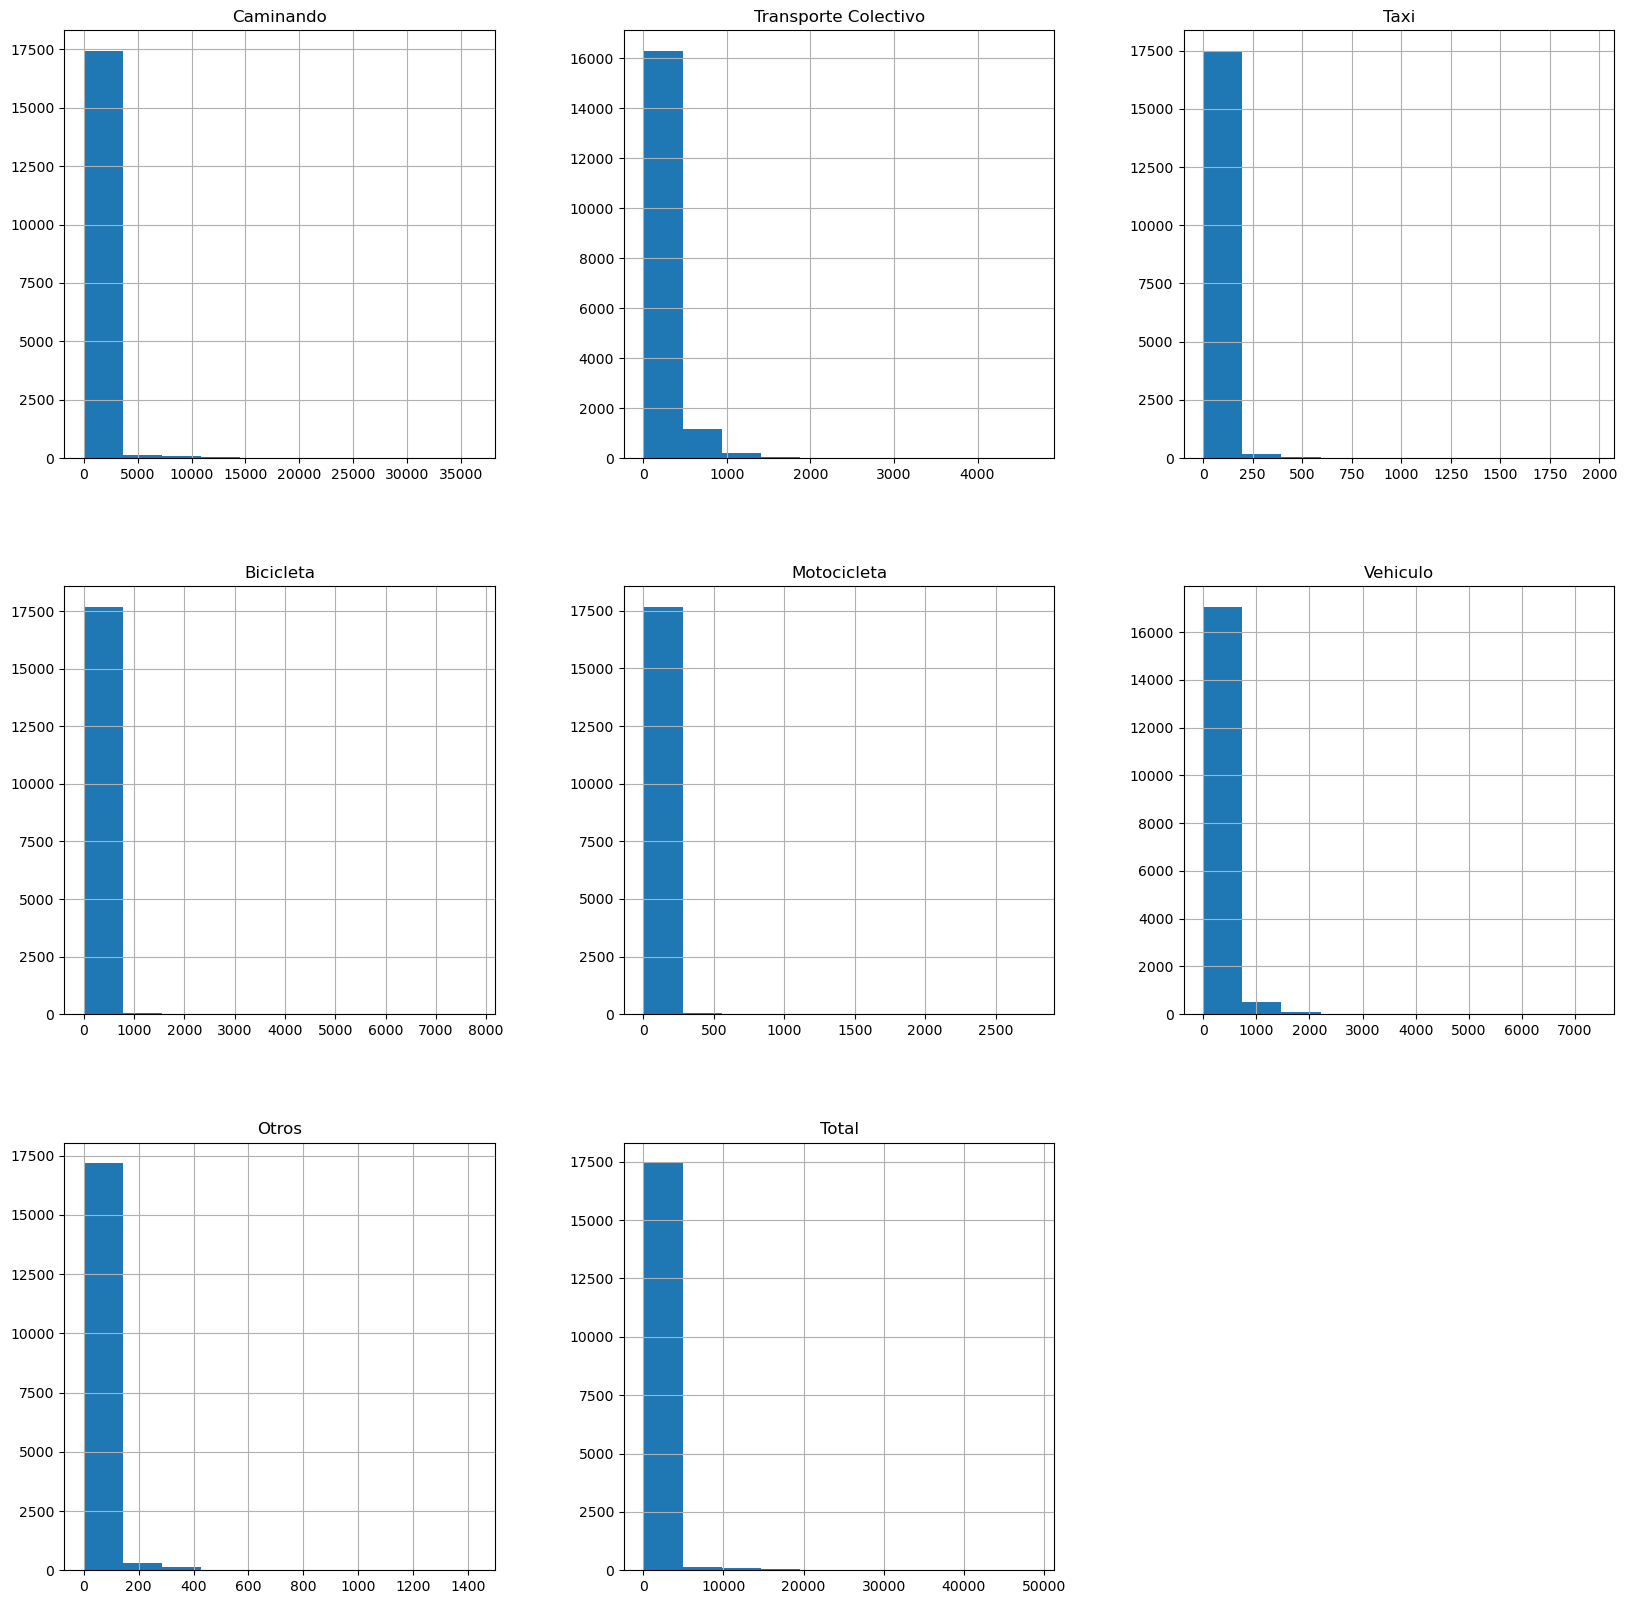

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
data[targets].hist(ax = ax)
plt.show()

In [29]:
model_0.load_weights('./model/NN/model_0.h5')
model_0.evaluate(X_test, y_test, verbose=2)

111/111 - 0s - loss: 88013.4297 - mae: 111.4312 - mse: 88013.4297 - 202ms/epoch - 2ms/step


[88013.4296875, 111.43122100830078, 88013.4296875]

In [30]:
y_pred_0 = model_0.predict(X_test)

111/111 [==============================] - 0s 2ms/step


In [31]:
y_pred_0 = pd.DataFrame(y_pred_0, index=y_test.index, columns=y_test.columns)
y_pred_0[y_pred_0 < 0] = 0
y_pred_0 = y_pred_0.astype(int)
y_pred_0

,,Caminando,Transporte Colectivo,Taxi,Bicicleta,Motocicleta,Vehiculo,Otros,Total
Origen,Destino,,,,,,,,
121.0,132.0,366,261,2,20,0,276,7,966
148.0,313.0,23,60,5,0,0,60,0,115
144.0,294.0,57,166,0,0,6,284,0,544
224.0,186.0,45,143,38,0,1,177,0,402
333.0,4.0,0,137,216,0,92,158,0,449
...,...,...,...,...,...,...,...,...,...
124.0,75.0,75,84,2,0,0,79,0,244
19.0,94.0,0,70,0,0,0,81,0,139
446.0,158.0,0,47,0,0,0,76,0,158


In [32]:
with open('./model/flux.pkl', 'wb') as f:  # open a text file
    pickle.dump(model_0, f)

In [33]:
with open('./model/flux.pkl', 'rb') as f:
    fluxModel = pickle.load(f)

In [35]:
x = pd.DataFrame(fluxModel.predict(data[predictors]), index=data[predictors].index, columns=data[targets].columns)
x[x < 0] = 0
x = x.astype(int)
x

555/555 [==============================] - 1s 2ms/step


Caminando  Transporte Colectivo  Taxi  Bicicleta  Motocicleta  \
Origen Destino                                                                  
1.0    1.0           1955                   170     8         33           22   
       2.0             91                    76    69          0           67   
       3.0             74                   155     4          0            0   
       4.0              6                    94    91          0           81   
       14.0            71                   104    19          0            2   
...                   ...                   ...   ...        ...          ...   
490.0  403.0          118                     0     9          0            0   
       406.0           76                    23    21          0            0   
       446.0           69                     0    24          0            0   
       458.0            0                    44    39         27            0   
       490.0         1042                    95     1        181           12   

                Vehiculo  Otros  Total  
Origen Destino                          
1.0    1.0           114      0   2337  
       2.0             0      0    413  
       3.0            55      0    260  
       4.0             0      0    325  
       14.0           85      0    191  
...                  ...    ...    ...  
490.0  403.0         173      0    255  
       406.0         170      0    279  
       446.0         222      0    310  
       458.0         135     13    217  
       490.0         646      0   1936  

[17737 rows x 8 columns]

C:\Users\Rafael\AppData\Local\Temp\ipykernel_24524\110176239.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  x.hist(ax = ax)


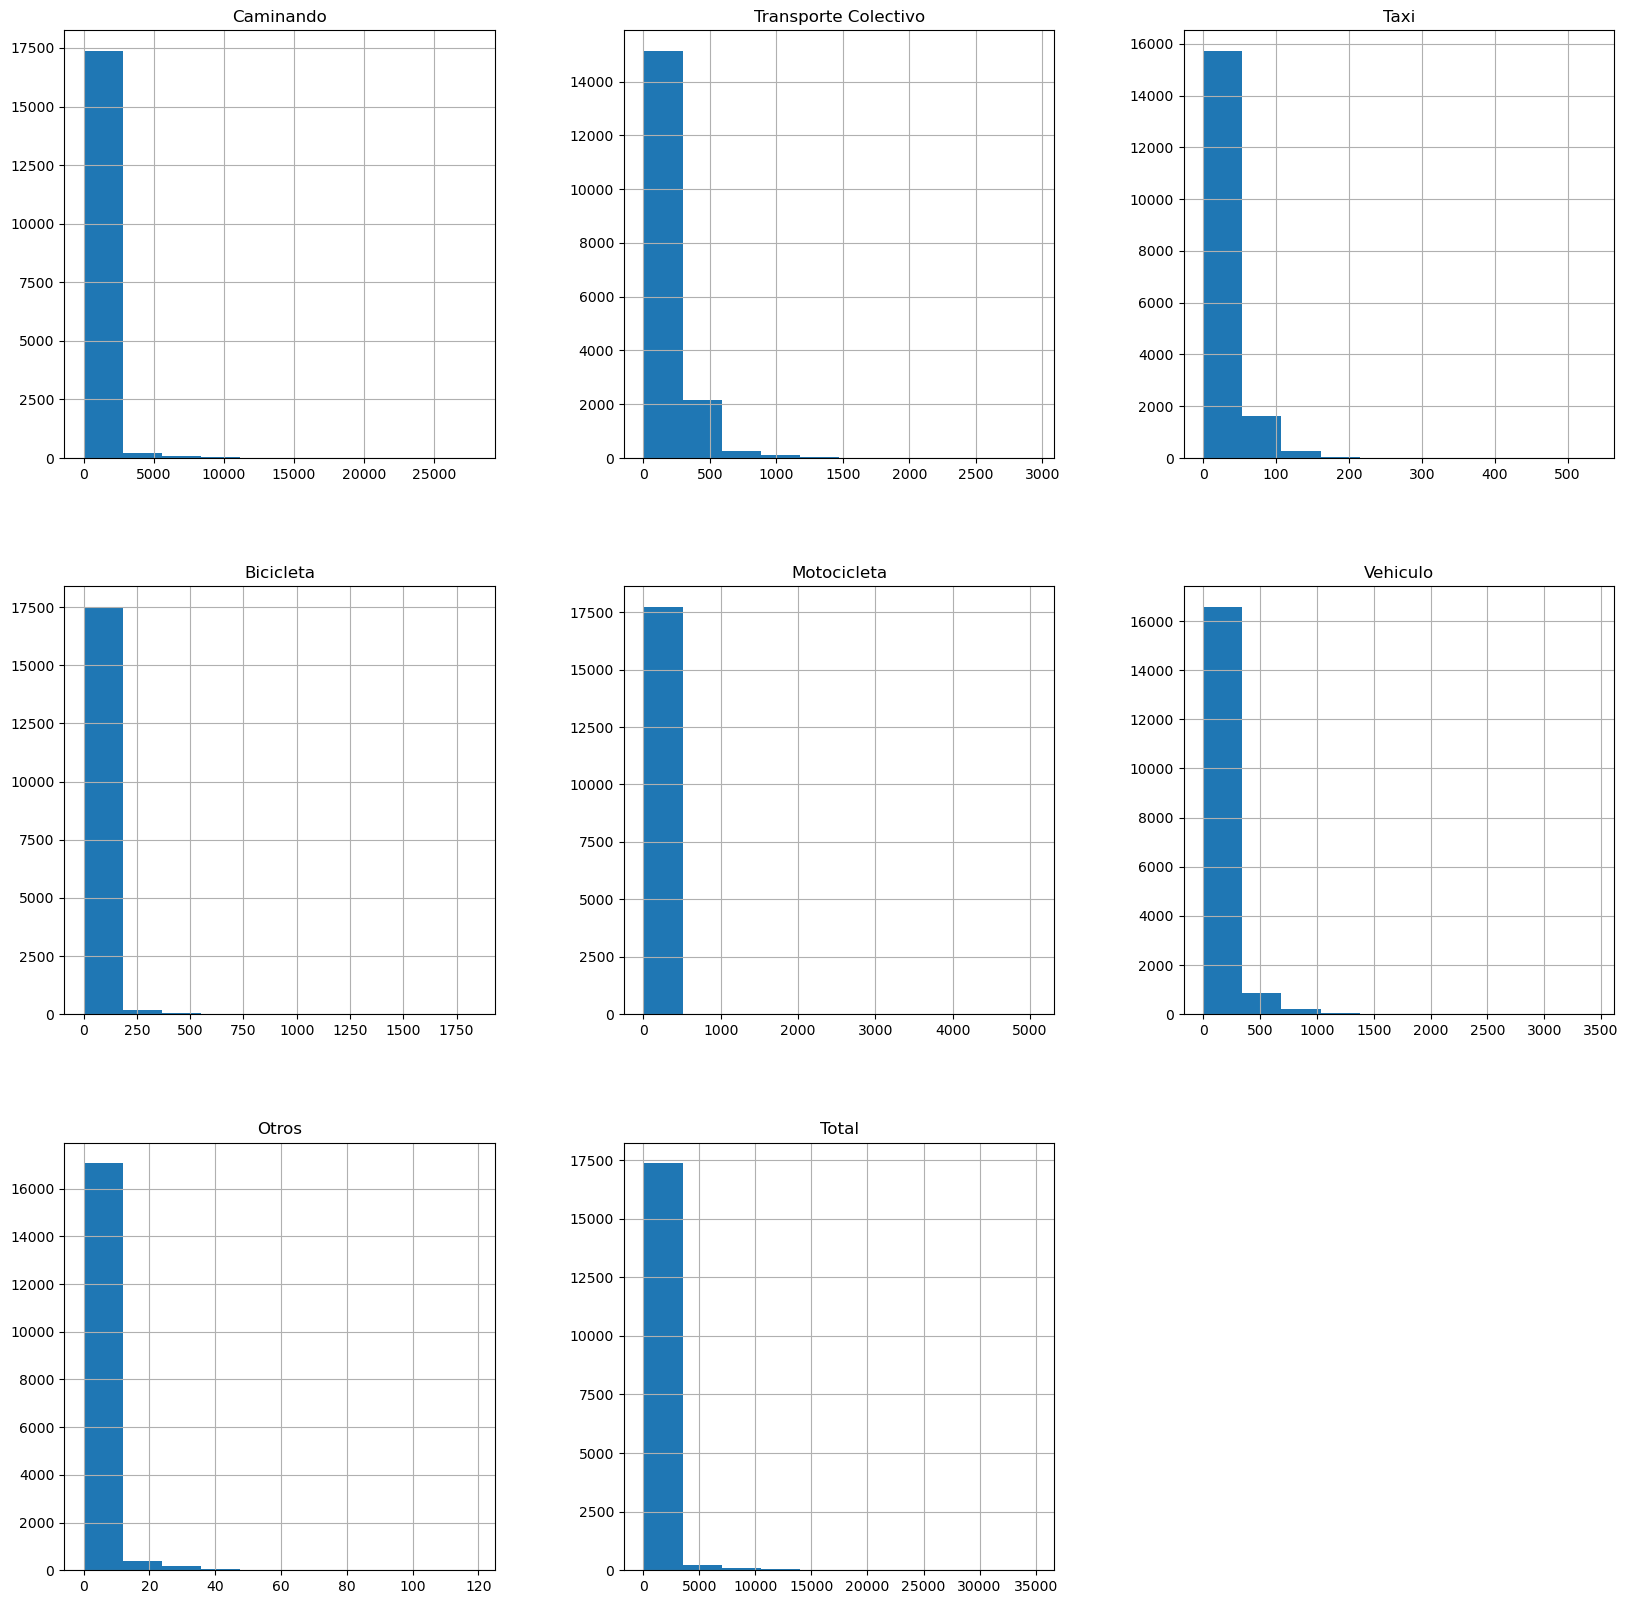

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
x.hist(ax = ax)
plt.show()